In [136]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np
import pandas as pd

In [3]:
folder_path = r'D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset'

In [4]:
categories = ['Bear','Cat','Cow','Deer','Dog','Dolphin','Elephant','Giraffe','Horse','Kangaroo','Lion','Panda','Tiger','Zebra']

In [5]:
for category in categories:
    for file in os.listdir(os.path.join(folder_path, category)):
        img_path=os.path.join(folder_path, category, file)
        print(img_path)

D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\bear_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_10.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_10_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_10_2.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_10_3.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_11.jpeg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_11_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Inte

In [ ]:
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_10_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Cat\Cat_16_2.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Cow\Cow_20_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Deer\Deer_19_3.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Dog\Dog_17_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Dolphin\Dolphin_15_3.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Elephant\Elephant_16.jpeg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Giraffe\Giraffe_18_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Horse\Horse_18.jpeg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Kangaroo\Kangaroo_15.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Lion\Lion_20_2.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Panda\Panda_25_3.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Tiger\Tiger_19_2.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Zebra\Zebra_17_3.jpg

In [7]:
data=[]
labels=[]

In [9]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(folder_path, category)):
        img_path=os.path.join(folder_path, category, file)
        img=imread(img_path)
        img=resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)

labels=np.asarray(labels)
data=np.asarray(data)

In [10]:
len(labels)

1807

In [11]:
len(data)

1807

# Random Forest Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [82]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=0, shuffle =True, stratify=labels)

In [83]:
sc=StandardScaler()

In [84]:
x_train=sc.fit_transform(x_train)

In [85]:
x_test=sc.fit_transform(x_test)

In [86]:
rfc=RandomForestClassifier(n_estimators = 1000)

In [87]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [88]:
y_pred=rfc.predict(x_test)

In [89]:
accuracy_score(y_test, y_pred)

0.6049723756906077

In [90]:
pd.DataFrame({'Actual_Value':y_test, 'Predicted_Value':y_pred})

,Actual_Value,Predicted_Value
0,13,13
1,7,13
2,6,6
3,9,9
4,4,4
...,...,...
357,5,5
358,6,6
359,12,12
360,6,0


# Hyperparameter Tuning - RandomForestClassifier

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
rfc=RandomForestClassifier(random_state=42)

In [93]:
param_grid={
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth': [4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [94]:
cv_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid, cv=5)

In [95]:
cv_rfc.fit(x_train, y_train)

C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

cv_rfc.best_params_

In [97]:
rfc1=RandomForestClassifier(random_state=42 , max_features ='sqrt' , n_estimators=200 , max_depth=8 , criterion ='entropy' )

In [98]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=42)

In [99]:
y_pred =rfc1.predict(x_test)

In [100]:
accuracy_score(y_test, y_pred)

0.5248618784530387

# Neural Network Classification

## Multi Class Classification

In [42]:
data=[]
labels=[]

In [64]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(folder_path, category)):
        img_path=os.path.join(folder_path, category, file)
        img=imread(img_path)
        
        #img=resize(img,(100,100))
        #img_arr=np.array(img)
        data.append(img)
        labels.append(category_idx)

In [65]:
data

[array([[[159, 178, 132],
         [158, 177, 131],
         [162, 184, 138],
         ...,
         [176, 190, 157],
         [174, 187, 157],
         [173, 186, 156]],
 
        [[160, 179, 134],
         [159, 178, 133],
         [163, 185, 139],
         ...,
         [174, 189, 156],
         [174, 188, 155],
         [174, 189, 156]],
 
        [[163, 181, 139],
         [162, 181, 136],
         [164, 186, 140],
         ...,
         [171, 188, 152],
         [172, 188, 152],
         [173, 190, 154]],
 
        ...,
 
        [[149, 168, 104],
         [148, 166, 104],
         [161, 178, 126],
         ...,
         [179, 199, 150],
         [175, 196, 153],
         [173, 194, 153]],
 
        [[147, 166, 100],
         [147, 165, 103],
         [163, 180, 128],
         ...,
         [174, 195, 136],
         [174, 197, 143],
         [178, 200, 151]],
 
        [[149, 169, 100],
         [151, 169, 107],
         [166, 183, 131],
         ...,
         [162, 184, 120],
  

In [66]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,


In [67]:
df = pd.DataFrame({
    'Image': data,
    'Label': labels
})

In [68]:
df.head(5)

,Image,Label
0,"[[[159, 178, 132], [158, 177, 131], [162, 184,...",0
1,"[[[156, 169, 159], [154, 168, 155], [156, 169,...",0
2,"[[[241, 242, 247], [241, 242, 247], [241, 242,...",0
3,"[[[143, 154, 140], [141, 152, 138], [138, 150,...",0
4,"[[[26, 28, 25], [25, 27, 24], [24, 26, 23], [2...",0


In [69]:
Img_Data=df.sample(frac=1).reset_index(drop=True)

In [70]:
Img_Data.head(4)

,Image,Label
0,"[[[188, 177, 85], [186, 175, 85], [182, 172, 8...",9
1,"[[[166, 159, 153], [166, 159, 153], [167, 159,...",6
2,"[[[50, 50, 50], [50, 50, 50], [50, 50, 50], [5...",2
3,"[[[88, 80, 43], [92, 82, 47], [92, 75, 49], [9...",8


In [71]:
Img_Data.shape

(3614, 2)

In [54]:
import tensorflow as tf

In [55]:
from sklearn.model_selection import train_test_split

In [72]:
x=Img_Data["Image"]
y=Img_Data["Label"]

In [73]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [74]:
tf.random.set_seed(42)

In [75]:
model_1=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(100,100)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(14, activation="softmax")
])

C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [77]:
non_norm_history=model_1.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

## Accessing Images

In [111]:
data=[]
labels=[]
n_labels=[]

In [112]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(folder_path, category)):
        img_path=os.path.join(folder_path, category, file)
        
        img=tf.io.read_file(img_path)
        
        img=tf.image.decode_image(img,channels=3)
        img=tf.image.resize(img,[64,64])
        img_tensor=tf.convert_to_tensor(img)

        data.append(img_tensor)
        labels.append(category)
        n_labels.append(category_idx)

In [113]:
df=pd.DataFrame({"Image": data, "Labels": labels, "Enc_Labels": n_labels})

In [114]:
df.head(4)

,Image,Labels,Enc_Labels
0,"(((tf.Tensor(160.25, shape=(), dtype=float32),...",Bear,0
1,"(((tf.Tensor(149.5, shape=(), dtype=float32), ...",Bear,0
2,"(((tf.Tensor(238.75, shape=(), dtype=float32),...",Bear,0
3,"(((tf.Tensor(138.9375, shape=(), dtype=float32...",Bear,0


In [115]:
#shuffling the dataframe
Img_Data=df.sample(frac=1).reset_index(drop=True)

In [116]:
Img_Data.head(4)

,Image,Labels,Enc_Labels
0,"(((tf.Tensor(6.875, shape=(), dtype=float32), ...",Cow,2
1,"(((tf.Tensor(6.9375, shape=(), dtype=float32),...",Panda,11
2,"(((tf.Tensor(58.6875, shape=(), dtype=float32)...",Zebra,13
3,"(((tf.Tensor(107.6875, shape=(), dtype=float32...",Zebra,13


In [117]:
x=Img_Data["Image"]
y=Img_Data["Labels"]
z=Img_Data["Enc_Labels"]

## Normalizing the data 

In [118]:
image=r'D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Lion\Lion_16_1.jpg'

In [119]:
img=tf.io.read_file(image)
img = tf.image.decode_image(img, channels=3)  # Ensure 3 channels (RGB)

# Find the max and min pixel values
max_value = tf.reduce_max(img).numpy()
min_value = tf.reduce_min(img).numpy()

print(f"Maximum pixel value: {max_value}")
print(f"Minimum pixel value: {min_value}")

Maximum pixel value: 250
Minimum pixel value: 0


In [120]:
Img_Data['Image'] = Img_Data['Image'].apply(lambda x: x / 250.0)

In [121]:
Img_Data.head(4)

,Image,Labels,Enc_Labels
0,"(((tf.Tensor(0.0275, shape=(), dtype=float32),...",Cow,2
1,"(((tf.Tensor(0.02775, shape=(), dtype=float32)...",Panda,11
2,"(((tf.Tensor(0.23475, shape=(), dtype=float32)...",Zebra,13
3,"(((tf.Tensor(0.43075, shape=(), dtype=float32)...",Zebra,13


In [122]:
x=Img_Data["Image"]
y=Img_Data["Labels"]
z=Img_Data["Enc_Labels"]

In [103]:
z.unique()

array([ 4,  5,  1,  8,  6,  7,  0, 11, 10, 12, 13,  2,  9,  3])

## Splitting the Data 

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test, y_train, y_test= train_test_split(x,z, test_size=0.2, random_state=42)

In [123]:
Img_Data.shape

(1807, 3)

In [124]:
train_indices= range(0,1447)
test_indices=range(1447,1807)

In [128]:
train_data=Img_Data.loc[:1447,"Image"]
test_data=Img_Data.loc[1448:,"Image"]
train_labels=Img_Data.loc[:1447, "Enc_Labels"]
test_labels=Img_Data.loc[1448:, "Enc_Labels"]

In [132]:
train_data = tf.convert_to_tensor(train_data)
train_labels = tf.convert_to_tensor(train_labels)
test_data = tf.convert_to_tensor(test_data)
test_labels = tf.convert_to_tensor(test_labels)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tensorflow.python.framework.ops.EagerTensor).

# Neural Network Classification

## Multi Class Classification

In [129]:
model_1=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(64,64,3)),
        tf.keras.layers.Dense(4, activation ="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(14, activation="softmax")
        ])

C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [131]:
norm_history= model_1.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type tensorflow.python.framework.ops.EagerTensor).

In [135]:
train_data

0       (((tf.Tensor(0.0275, shape=(), dtype=float32),...
1       (((tf.Tensor(0.02775, shape=(), dtype=float32)...
2       (((tf.Tensor(0.23475, shape=(), dtype=float32)...
3       (((tf.Tensor(0.43075, shape=(), dtype=float32)...
4       (((tf.Tensor(0.04625, shape=(), dtype=float32)...
                              ...                        
1443    (((tf.Tensor(0.98925, shape=(), dtype=float32)...
1444    (((tf.Tensor(0.055, shape=(), dtype=float32), ...
1445    (((tf.Tensor(0.5225, shape=(), dtype=float32),...
1446    (((tf.Tensor(0.90125, shape=(), dtype=float32)...
1447    (((tf.Tensor(0.064, shape=(), dtype=float32), ...
Name: Image, Length: 1448, dtype: object

# Neural Network Classification

In [137]:
folder_path = r'D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset'

In [138]:
categories = ['Bear','Cat','Cow','Deer','Dog','Dolphin','Elephant','Giraffe','Horse','Kangaroo','Lion','Panda','Tiger','Zebra']

In [139]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [146]:


# Load dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,  # Reserve 20% of data for validation
    subset="training",
    seed=123,  # Set seed for reproducibility
    image_size=(64, 64),  # Resize images to 64x64
    #batch_size=32  # Number of images per batch
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    #batch_size=32
)


Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


In [147]:
#Normalize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

In [142]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

In [148]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')  # 14 classes for classification
])


In [166]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [150]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20  # Set desired number of epochs
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.0882 - loss: 2.7205 - val_accuracy: 0.1340 - val_loss: 2.5683
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.2329 - loss: 2.4124 - val_accuracy: 0.3144 - val_loss: 2.2374
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.3697 - loss: 2.0191 - val_accuracy: 0.4227 - val_loss: 2.0218
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.5022 - loss: 1.6484 - val_accuracy: 0.4974 - val_loss: 1.8201
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.6255 - loss: 1.3306 - val_accuracy: 0.5902 - val_loss: 1.5722
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.6903 - loss: 1.0284 - val_accuracy: 0.6418 - val_loss: 1.4549
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.7615 - loss: 0.7617 - val_accuracy: 0.6881 - val_loss: 1.3856
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.8192 - loss: 0.6667 - val_accuracy:

In [151]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7421 - loss: 1.6361
Validation Loss: 1.6331431865692139
Validation Accuracy: 0.7396907210350037


In [152]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,881,263 (18.62 MB)

 Trainable params: 1,627,087 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,254,176 (12.41 MB)

## Prediction 

In [154]:
img_path = r"D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Cow\Cow_13_2.jpg"

# Preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = normalization_layer(img_array)  # Normalize

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class: 3


## Finding the Ideal Learning Rate

In [155]:
#creating the learning rate call back
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

In [156]:
#fit the model
find_lr_history=model.fit(train_dataset,
                          epochs=20,
                          validation_data=validation_dataset, 
                          callbacks=[lr_scheduler])

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9766 - loss: 0.1173 - val_accuracy: 0.7655 - val_loss: 1.5985 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9591 - loss: 0.1554 - val_accuracy: 0.7784 - val_loss: 1.5574 - learning_rate: 0.0011
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.9760 - loss: 0.0931 - val_accuracy: 0.7706 - val_loss: 1.7116 - learning_rate: 0.0013
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.9712 - loss: 0.1213 - val_accuracy: 0.7191 - val_loss: 1.8867 - learning_rate: 0.0014
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9419 - loss: 0.2338 - val_accuracy: 0.7500 - val_loss: 1.7103 - learning_rate: 0.0016
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9323 - loss: 0.2300 - val_accuracy: 0.7268 - val_loss: 1.9525 - learning_rate: 0.0018
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9364 - loss: 0.2465 

In [159]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.5595 - loss: 2.6298
Validation Loss: 2.457728624343872
Validation Accuracy: 0.5592783689498901


In [167]:
class LearningRateTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        self.lrs = []
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy()  # Get the current learning rate
        self.lrs.append(lr)
        self.losses.append(logs["loss"])  # Track training loss


In [168]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))


In [169]:
lr_tracker = LearningRateTracker()

In [170]:
# Train the model
find_lr_history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=[lr_scheduler, lr_tracker]  # Use both callbacks
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.8826 - loss: 0.4805 - val_accuracy: 0.7526 - val_loss: 1.6701 - learning_rate: 0.0010
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.9373 - loss: 0.3372 - val_accuracy: 0.7474 - val_loss: 1.7599 - learning_rate: 0.0011
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.9467 - loss: 0.2553 - val_accuracy: 0.7655 - val_loss: 1.8839 - learning_rate: 0.0013
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.9532 - loss: 0.1622 - val_accuracy: 0.7784 - val_loss: 1.9023 - learning_rate: 0.0014
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9719 - loss: 0.0998 - val_accuracy: 0.7758 - val_loss: 1.9870 - learning_rate: 0.0016
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.9827 - loss: 0.0627 - val_accuracy: 0.7680 - val_loss: 2.0248 - learning_rate: 0.0018
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9731 - loss: 0.1154 

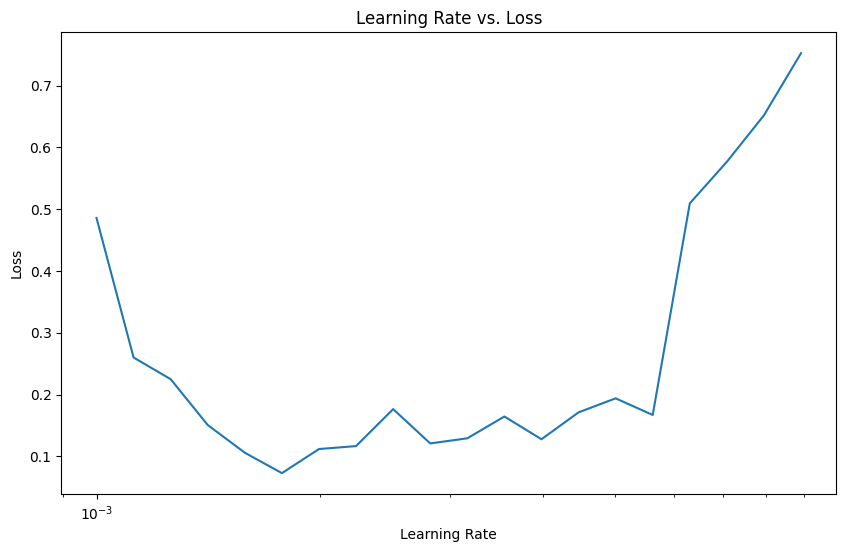

In [171]:
# Plot the learning rate vs. loss
plt.figure(figsize=(10, 6))
plt.semilogx(lr_tracker.lrs, lr_tracker.losses)
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")
plt.show()

In [172]:
10**-3

0.001

In [175]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')  # 14 classes for classification
])

In [176]:
# Compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [177]:
history_1 = model_1.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20  # Set desired number of epochs
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.1099 - loss: 2.7298 - val_accuracy: 0.2191 - val_loss: 2.5452
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.2141 - loss: 2.4779 - val_accuracy: 0.3067 - val_loss: 2.3001
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.3279 - loss: 2.1414 - val_accuracy: 0.4072 - val_loss: 1.9932
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.4629 - loss: 1.8045 - val_accuracy: 0.4768 - val_loss: 1.8066
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.5244 - loss: 1.4988 - val_accuracy: 0.5155 - val_loss: 1.6542
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.6053 - loss: 1.2992 - val_accuracy: 0.5799 - val_loss: 1.5397
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.6691 - loss: 1.1054 - val_accuracy: 0.6211 - val_loss: 1.4924
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.7292 - loss: 0.9461 - val_accuracy: 

In [178]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0550 - loss: 2.7083
Validation Loss: 2.7096195220947266
Validation Accuracy: 0.05154639109969139


# Prediction

In [ ]:
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Bear\Bear_10_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Cat\Cat_16_2.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Cow\Cow_20_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Deer\Deer_19_3.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Dog\Dog_17_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Dolphin\Dolphin_15_3.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Elephant\Elephant_16.jpeg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Giraffe\Giraffe_18_1.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Horse\Horse_18.jpeg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Kangaroo\Kangaroo_15.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Lion\Lion_20_2.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Panda\Panda_25_3.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Tiger\Tiger_19_2.jpg
D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Zebra\Zebra_17_3.jpg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


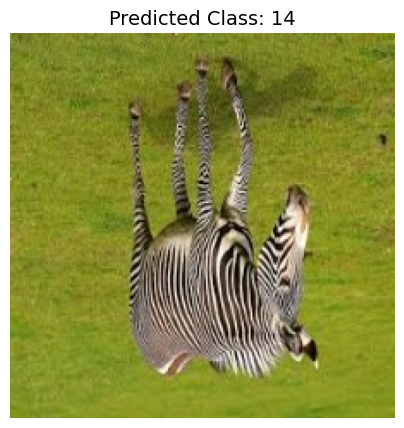

In [198]:
# Path to the image
img_path = r"D:\Users\ASHIQ-PC\Desktop\python Programs\Unified_Mentor_Internship\Projects\Projects\Animal Classification\dataset\Zebra\Zebra_17_3.jpg"

# Preprocess the image
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))  # Load and resize image
img_array = tf.keras.utils.img_to_array(img)  # Convert image to array
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize (if a normalization layer is not used)

# Predict
predictions = model_1.predict(img_array)
predicted_class = np.argmax(predictions)
predicted_class_name=category
# Display the image and predicted class
plt.figure(figsize=(5, 5))
plt.imshow(tf.keras.utils.load_img(img_path))  # Display the original image
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class}", fontsize=14)
plt.show()